In [87]:
import numpy as np
import matplotlib.pyplot as plt
import random

total_minutes = 3 * 24 * 60
time = np.arange(total_minutes)

def half_ellipse(t, duration, amplitude, base_level):
    """Returns a half-ellipse curve for a given time period and amplitude."""
    return base_level + amplitude * np.sqrt(1 - (2 * (t / duration) - 1) ** 2)

def two_peak(t, duration, amplitude, base_level):
    """Returns a two-peak curve within a time period."""
    return base_level + amplitude * (np.sin(2 * np.pi * t / duration) ** 2)

def triangular_ramp(t, duration, amplitude, base_level):
    """Returns a triangular ramp structure."""
    return base_level + amplitude * (t / duration)

def step_function(t, duration, amplitude, base_level):
    """Returns a step function for the workload."""
    return base_level + np.where(t < duration // 2, amplitude, amplitude * 0.5)

def custom_multi_peak(t, duration, amplitude, base_level):
    """Custom multi-peak structure with varying heights, based on the uploaded image."""
    return base_level + amplitude * (0.8 * np.sin(np.pi * t / duration) + 0.5 * np.sin(3 * np.pi * t / duration))

def gaussian_peak(t, duration, amplitude, base_level):
    """Returns a Gaussian (bell-shaped) peak."""
    return base_level + amplitude * np.exp(-((t - duration / 2) ** 2) / (2 * (duration / 8) ** 2))

def exponential_rise_fall(t, duration, amplitude, base_level):
    """Returns an exponential rise and fall structure."""
    rise_fall = np.where(t < duration // 2, np.exp(t / duration), np.exp((duration - t) / duration))
    return base_level + amplitude * (rise_fall - 1) / (np.exp(0.5) - 1)

def add_random_noise(workload, noise_level):
    """Add random noise to the workload."""
    noise = np.random.normal(0, noise_level, len(workload))
    return np.maximum(0, workload + noise)

shapes = [
    half_ellipse, two_peak, triangular_ramp, step_function, custom_multi_peak,
    gaussian_peak, exponential_rise_fall
]


def generate_workloads(shapes, min_period, max_period, min_amp, max_amp, min_base_level=0.1, max_base_level=0.5):
    workload = np.zeros(total_minutes)
    
    i = 0
    
    while i < total_minutes:
        duration = random.randint(min_period, max_period)
        amplitude = random.uniform(min_amp, max_amp)
        shape_function = random.choice(shapes)
        
        end_time = min(i + duration, total_minutes)
        current_base_level = max_amp * np.random.uniform(0.2, 0.7)
        
        workload[i:end_time] = shape_function(
            np.arange(end_time - i), duration, amplitude, current_base_level
        )
        
        if end_time < total_minutes:
            workload[end_time] = current_base_level
            
        i += duration
        
    return workload

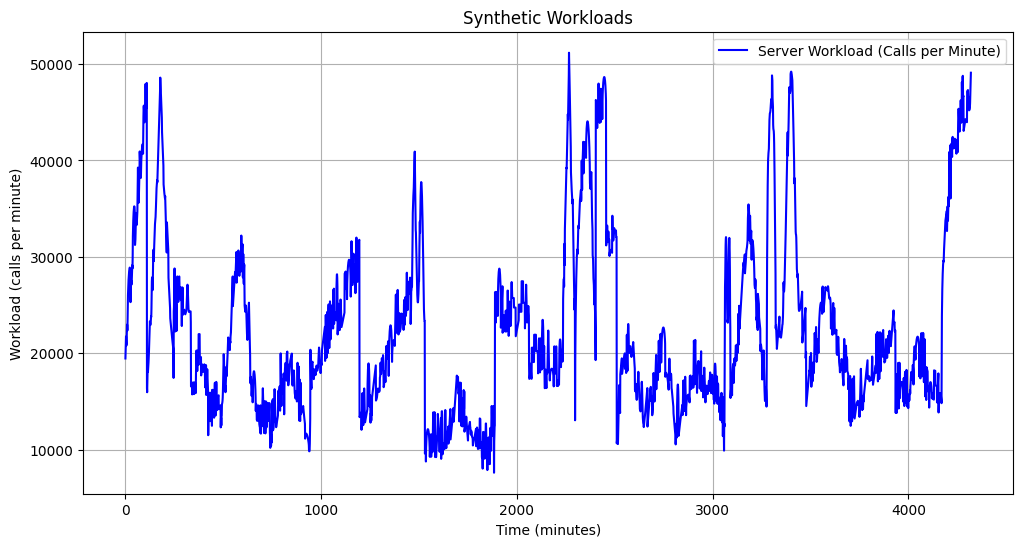

In [98]:
base_workload = generate_workloads(shapes, 20, 360, 4000, 30000)
noise_workload = generate_workloads(shapes, 5, 20, 500, 5000)

total_workload = base_workload + noise_workload

# Plot the updated workload with custom peaks and more diverse widths
plt.figure(figsize=(12, 6))
plt.plot(time, total_workload, label='Server Workload (Calls per Minute)', color='blue')
plt.xlabel('Time (minutes)')
plt.ylabel('Workload (calls per minute)')
plt.title('Synthetic Workloads')
plt.grid(True)
plt.legend()
plt.savefig('../plots/workloads/synthetic_workload.png')
plt.show()

0.39789249209428734